https://anilcanatik.com/projects/yelp_sentiment.html

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import re
import matplotlib.pyplot as plt


In [6]:
df_load = pd.read_csv("C:/University_Courses/NLP/Sentiment_Analysis/Movies_Review_Sentiment_Analysis_in_NLP/Yelp/yelp.csv")
df_raw=df_load
df_raw1=df_raw

In [7]:
df_raw=df_load
df_raw1=df_raw

In [8]:
df_raw.head(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars
0,rLtl8ZkDX5vH5nAx9C3q5Q,My wife took me here on my birthday for breakf...,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,9yKzy9PApeiPPOUJEtnvkg,0,2,5,5
1,0a2KyEL0d3Yb1V6aivbIuQ,I have no idea why some people give bad review...,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,ZRJwVLyzEJq1VAihDhYiow,0,0,0,5
2,0hT2KtfLiobPvh6cDC8JQg,love the gyro plate. Rice is so good and I als...,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,6oRAC4uyJCsJl1X0WZpVSA,0,0,1,4


In [10]:
df_raw.shape    

(10000, 9)

In [11]:
df_raw[["user_id","date","review_id","business_id"]]=df_raw1[["user_id","date","review_id","business_id"]].replace(to_replace=r'^.|.$', value='', regex=True)
df_raw.head(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars
0,Ltl8ZkDX5vH5nAx9C3q5,My wife took me here on my birthday for breakf...,/26/201,WKvX83p0-ka4JS3dc6E5,yKzy9PApeiPPOUJEtnvk,0,2,5,5
1,a2KyEL0d3Yb1V6aivbIu,I have no idea why some people give bad review...,/27/201,jZ33sJrzXqU-0X6U8Nwy,RJwVLyzEJq1VAihDhYio,0,0,0,5
2,hT2KtfLiobPvh6cDC8JQ,love the gyro plate. Rice is so good and I als...,/14/201,ESLBzqUCLdSzSqm0eCSx,oRAC4uyJCsJl1X0WZpVS,0,0,1,4


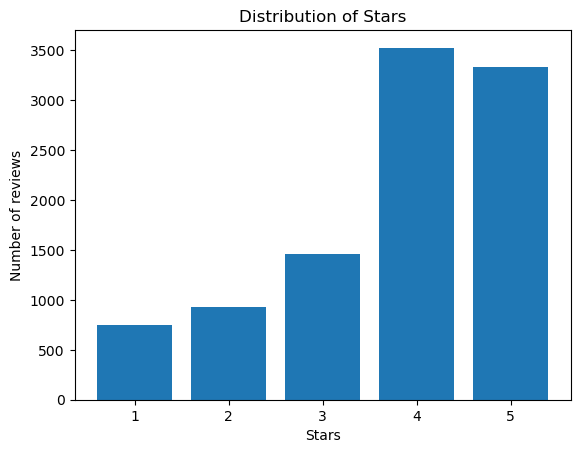

In [12]:
values, counts = np.unique(df_raw['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()


In [13]:
print(df_raw.stars.value_counts())

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


In [14]:
business = df_raw.business_id
business.value_counts()

NAME                    176
tN85eu27C04nwyPa8IHt     37
okKtdXU7zXHcr20Lrk29     37
W0Ne_HTHEAgGF1rAdmR-     34
Ny1uzcmm_UHmTyR--o5I     32
                       ... 
nfSnHElLXntC6lWjomWP      1
KB3eQJASverUUah-I_0Z      1
VR7ss3gCgRmXZT7TvZgz      1
3_amLppmBrfBYUfaI0nV      1
96lWMIAUhYIYy9gOktiv      1
Name: business_id, Length: 4117, dtype: int64

In [15]:
user = df_raw.user_id
user.value_counts()

NAME                    121
czQCSmaWF78toLEmb0Zs     38
CMz8YaO3f8xu4KqQgKb9     25
0a6z--_CUrl84aCzZyPs     22
ozupHULqGyO42s3zNUzO     18
                       ... 
SweAOS_ChLQVv7pb51J4      1
cdsKXNPHmVzi5qPQSCut      1
1PxZJvRo4tu-ruOXa5Mq      1
UN5ojieloDD4WvohQo77      1
SBFytcdjPKZgXKQnYQdk      1
Name: user_id, Length: 6325, dtype: int64

In [18]:
#import sys
#print(sys.executable)

c:\Users\ADH\anaconda3\python.exe


In [ ]:
#!c:/Users/ADH/anaconda3/python.exe -m pip install wordcloud


In [21]:
from wordcloud import WordCloud


In [22]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
df_raw["Target"] = np.where(df_raw["stars"] > 3, 1, 0)
pos = df_raw[df_raw['Target']==1]['text']
neg = df_raw[df_raw['Target']==0]['text']
df_raw.tail(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars,Target
9997,GbN1aKQHMgfQZkqlsuwz,I recently visited Olive and Ivy for business ...,1/16/201,yznYkIbpqVmlsZxSDSyp,3YGfwmbW73JhFiemNeyz,0,0,0,4,1
9998,lyVoNazXa20WzUyZPLaQ,My nephew just moved to Scottsdale recently so...,2/2/201,UKq9WQE1qQbJ0DJbc-B6,SKdOoDHcFoxK5ZtsgHJo,0,0,0,2,0
9999,SBFytcdjPKZgXKQnYQdk,4-5 locations.. all 4.5 star average.. I think...,0/16/201,WSmOhg2ID1MNZHaWapGb,F7uRzygyZsltbmVpjIyv,0,0,0,5,1


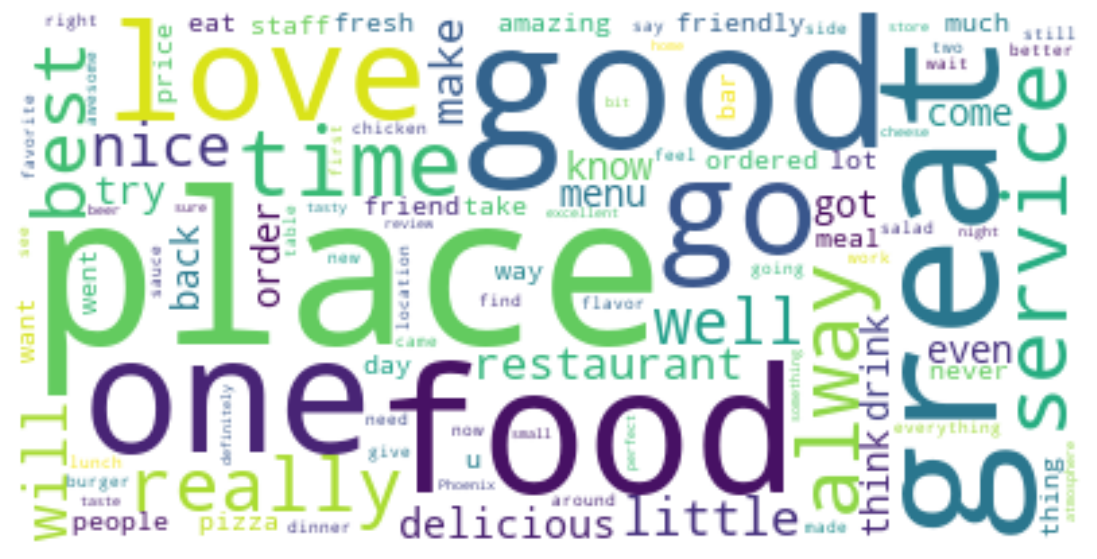

In [23]:
text_pos = " ".join(i for i in pos)
# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')
wc_pos.generate(text_pos)
plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()


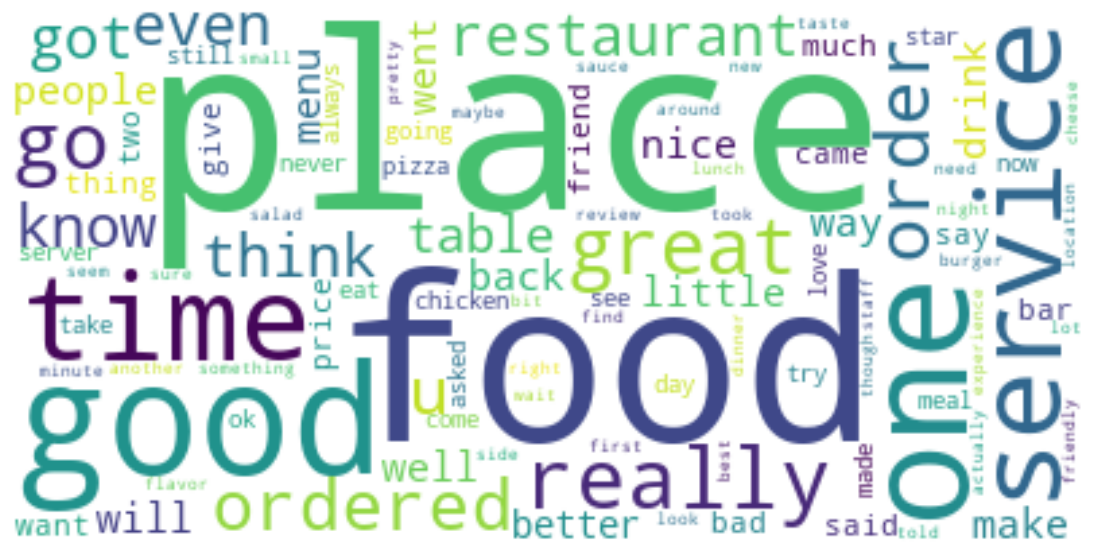

In [24]:
text_neg = " ".join(i for i in neg)
# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')
wc_neg.generate(text_neg)
plt.figure(figsize=(14,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:
from bs4 import BeautifulSoup
import spacy
import gensim.downloader as api


In [26]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


In [28]:
import string
def remove_punc(text):
  """ Remove puncuation """
  text = re.sub(r'[^\w\s]','',text)
  return text

In [29]:
#Removing Extra Whitespace:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

In [30]:
#All Lowercase:
def lowercase(text):
    """lowercase"""
    text = text.lower()
    return text

In [31]:
#Converting Accented Characters:
!pip install unidecode
import unidecode

In [35]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

In [34]:
!pip install contractions
import contractions

     -------------------------------------- 287.5/287.5 kB 4.5 MB/s eta 0:00:00


In [36]:
def expand_cont(text):
  clean_text=contractions.fix(text)
  return clean_text
#Demo:
expand_cont("you're happy now aren't you")


'you are happy now are not you'

In [37]:
def clean(text):
  #html removal:
  text = strip_html_tags(text)
  #removing extra Whitespace:
  text= remove_whitespace(text)
  #all lowercase:
  text = lowercase(text)
  #Converting Accented Charachters:
  text = remove_accented_chars(text)
  #Expanding Contractions:
  text = expand_cont(text)
  #Removing punctuation:
  text= remove_punc(text)
  return text
#Demo:
clean("<title>I am</title>    DEMOnstration café aren't I am! éffé!.")


'i am demonstration cafe are not i am effe'

In [38]:
df_pre = df_raw[["text","stars"]]
df_pre['text'] = df_pre['text'].apply(lambda x: clean(x))
df_pre.tail(3)


c:\Users\ADH\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\ADH\AppData\Local\Temp\ipykernel_19500\1207864657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['text'] = df_pre['text'].apply(lambda x: clean(x))


,text,stars
9997,i recently visited olive and ivy for business ...,4
9998,my nephew just moved to scottsdale recently so...,2
9999,45 locations all 45 star average i think arizo...,5


In [39]:
df_pre["target"] = np.where(df_pre["stars"] > 3, 1, 0)
df_pre.head(2)


C:\Users\ADH\AppData\Local\Temp\ipykernel_19500\3776377658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre["target"] = np.where(df_pre["stars"] > 3, 1, 0)


,text,stars,target
0,my wife took me here on my birthday for breakf...,5,1
1,i have no idea why some people give bad review...,5,1


In [40]:
from wordcloud import WordCloud
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
pos = df_pre[df_pre['target']==1]['text']
neg = df_pre[df_pre['target']==0]['text']
pos.tail(3)

9996    should be called house of deliciousness i coul...
9997    i recently visited olive and ivy for business ...
9999    45 locations all 45 star average i think arizo...
Name: text, dtype: object

In [41]:
target = df_pre['stars'].map(lambda x : 1 if int(x) > 3 else 0)

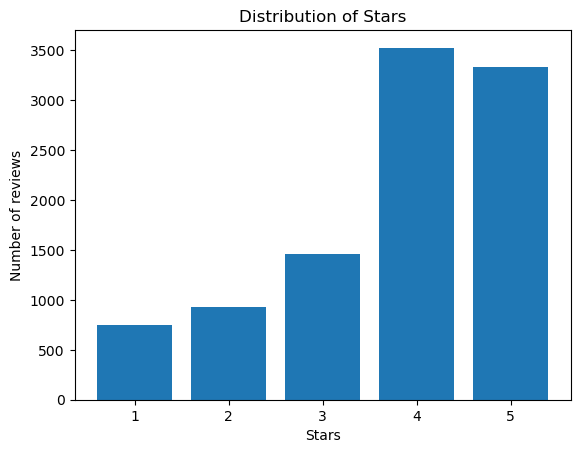

In [42]:
# The Stars distribution 
values, counts = np.unique(df_raw['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

In [43]:
print(df_pre.stars.value_counts())


4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


In [44]:
import pandas
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot

In [ ]:
pos_words = re.findall(r'\w+', text_pos)
neg_words = re.findall(r'\w+', text_neg)
def histogram_dict(word_list):

    word_dict = {}

    for word in word_list:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict
p= Counter(histogram_dict(pos_words))
n= Counter(histogram_dict(neg_words))
#for k, v in d.most_common(10):
# print('%s: %i' % (k, v))
set_pos = set(histogram_dict(pos_words).keys())
set_neg = set(histogram_dict(neg_words).keys())
print("Distinct Positive Reviews Words that does not include Distinct Negative Review Words: ")
print(set_pos-set_neg)

print("Distinct Negative Reviews Words that does not include Distinct Positive Review Words: ")
print(set_neg-set_pos)

In [46]:
textab = df_pre[df_pre['target'].isin([0,1])]['text']
texta = " ".join(i for i in textab)
text_words = re.findall(r'\w+', texta)
a=Counter(histogram_dict(text_words))
for k, v in a.most_common(20):
  print('%s: %i' % (k, v))

the: 66653
and: 43587
i: 41683
a: 35958
to: 30322
is: 23122
of: 21072
was: 20882
it: 20691
not: 15753
for: 15290
in: 14754
that: 12701
you: 11695
have: 11623
my: 11207
with: 10796
but: 10547
this: 10254
they: 9890


In [48]:
print("Distinct Words")
print(len(histogram_dict(text_words)))
print("Distinct Positive Words: ")
print(len(histogram_dict(pos_words)))
print("Distinct Negative Words: ")
print(len(histogram_dict(neg_words)))

Distinct Words
36284
Distinct Positive Words: 
30231
Distinct Negative Words: 
21626


In [51]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00


In [53]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 5.3 MB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     -------------------------------------- 895.9/895.9 kB 8.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 6.0/6.0 MB 10.1 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 3.7/3.7 MB 11.1 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-0.4.6-py2.py3

In [56]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.models import Sequential

In [57]:
### Create sequence

vocabulary_size = 5000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df_pre['text'])


sequences = tokenizer.texts_to_sequences(df_pre['text'])
data = pad_sequences(sequences, maxlen=500)


target1 = df_pre['target'].tolist()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [59]:
texts = df_pre['text'].tolist()
target1 = df_pre['target'].tolist()
print(len(texts))


10000


In [60]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=80)
vectors = vectorizer.fit_transform(texts)
print(vectors.shape)


(10000, 2710)


In [61]:
from sklearn.model_selection import train_test_split


In [63]:
from keras.models import Sequential
from keras.layers import Dense,  LSTM, Conv1D, MaxPooling1D, Dropout, Activation
#from keras.layers.embeddings import Embedding
from keras.layers import Embedding
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
import tensorflow as tf 


In [64]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, target1, test_size=0.2, random_state=1337)
print(X_train1.shape, X_test1.shape)

(8000, 500) (2000, 500)


In [65]:
model_embed = Sequential()
model_embed.add(Embedding(vocabulary_size, 100, input_length=500))
model_embed.add(Dropout(0.2))
model_embed.add(Conv1D(64, 5, activation='relu'))
model_embed.add(MaxPooling1D(pool_size=4))
model_embed.add(LSTM(100))
model_embed.add(Dense(1, activation='sigmoid'))
model_embed.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_embed.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          500000    
                                                                 
 dropout (Dropout)           (None, 500, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 64)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [66]:
model_embed.fit(X_train1, np.array(y_train1), epochs=1)

250/250 [==============================] - 35s 125ms/step - loss: 0.4980 - accuracy: 0.7595 - precision: 0.7673 - recall: 0.9329


In [68]:
y_pred0 = model_embed.predict(X_test1)
y_pred0 = np.round(y_pred0).astype(int)
#y_pred0 =(y_pred0>0.5)

# Accuracy
b = accuracy_score(y_test1, y_pred0)
print("Accuracy: {}".format(b))
# Recall
from sklearn.metrics import recall_score
c= recall_score(y_test1, y_pred0, average=None)
print("Recall: {}".format(c))
# Precision
from sklearn.metrics import precision_score
d= precision_score(y_test1, y_pred0, average=None)
print("Precision: {}".format(d))
# F1 Score
from sklearn.metrics import f1_score
e =f1_score(y_test1, y_pred0)
print("F1-Score: {}".format(e))

63/63 [==============================] - 3s 41ms/step
Accuracy: 0.82
Recall: [0.7807571  0.83821376]
Precision: [0.69134078 0.89174455]
F1-Score: 0.8641509433962264


In [70]:
# Confusion Matrix:
cm =confusion_matrix(y_test1, y_pred0)
embed_cm = pd.DataFrame(cm)
print("Model 1 - Confusion Matrix")
embed_cm

Model 1 - Confusion Matrix


,0,1
0,495,139
1,221,1145


In [71]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
